## Лабораторная работа №5. Алгоритмы кластеризации данных

## Растения(Plants) ##
Данные были извлечены из базы данных растений USDA.\
Она содержит все растения (виды и роды) в базе данных и штаты США и Канады, где они встречаются.\
Данные представлены в транзакционной форме.\
Содержат латинские названия (вид или род) и аббревиатуры государств.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AffinityPropagation
from sklearn.metrics import normalized_mutual_info_score
import numpy as np

In [181]:
# Путь к файлам
plants_data_path = 'plants1.data'
stateabbr_path = 'stateabbr.txt'

# Чтение списка регионов из stateabbr.txt
with open(stateabbr_path, 'r') as f:
    regions = []
    for line in f:
        parts = line.strip().split(' ')
        if len(parts) > 1 and parts[0].lower() not in ['state', 'u.s.']:
            regions.append(parts[0])


In [182]:
# Создаем бинарную матрицу с помощью pandas
plants = []
presence_matrix = []

with open(plants_data_path, 'r') as f:
    for line in f:
        parts = line.strip().split(',')
        plant_name = parts[0]
        plant_regions = parts[1:]  # Список регионов для растения
        
        # Заполняем строку для растения
        row = [1 if region in plant_regions else 0 for region in regions]
        
        plants.append(plant_name)
        presence_matrix.append(row)

df = pd.DataFrame(presence_matrix, columns=regions, index=plants)

df.to_csv('plants_binary_matrix.csv')

print(df.head())  

                        ab  ak  ar  az  ca  co  ct  de  dc  fl  ...  nt  ns  \
abelia                   0   0   0   0   0   0   0   0   0   1  ...   0   0   
abelia x grandiflora     0   0   0   0   0   0   0   0   0   1  ...   0   0   
abelmoschus              0   0   0   0   0   0   1   0   1   1  ...   0   0   
abelmoschus esculentus   0   0   0   0   0   0   1   0   1   1  ...   0   0   
abelmoschus moschatus    0   0   0   0   0   0   0   0   0   0  ...   0   0   

                        nu  on  pe  qc  sk  yt  dengl  fraspm  
abelia                   0   0   0   0   0   0      0       0  
abelia x grandiflora     0   0   0   0   0   0      0       0  
abelmoschus              0   0   0   0   0   0      0       0  
abelmoschus esculentus   0   0   0   0   0   0      0       0  
abelmoschus moschatus    0   0   0   0   0   0      0       0  

[5 rows x 69 columns]


In [183]:
us_states = ['ab', 'ak', 'ar', 'az', 'ca', 'co', 'ct', 'de', 'dc', 'fl', 'ga', 'hi', 'id', 'il', 'in', 'ia',
             'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv', 'nh', 'nj', 'nm',
             'ny', 'nc', 'nd', 'oh', 'ok', 'or', 'pa', 'pr', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va',
             'vi', 'wa', 'wv', 'wi',
            'wy']

canada_states = ['al', 'bc', 'mb', 'nb', 'lb', 'nf', 'nt', 'ns', 'nu', 'on', 'pe', 'qc',
                 'sk', 'yt',]

denmark_state = ['dengl']

france_state = ['fraspm'] 
# Countries in dataset
countries = ['USA', 'Canada', 'Denmark','France']

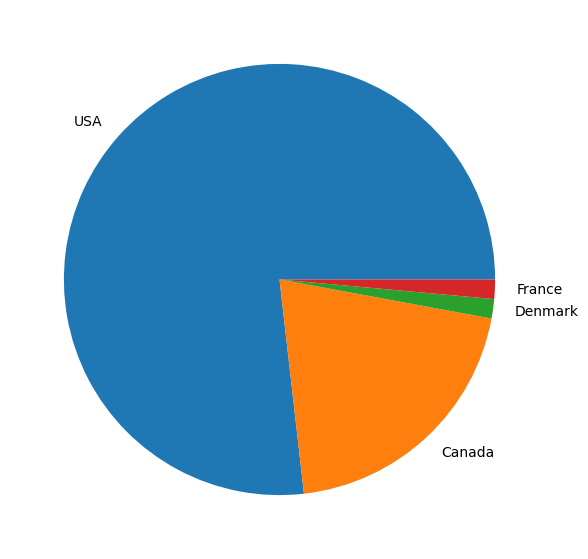

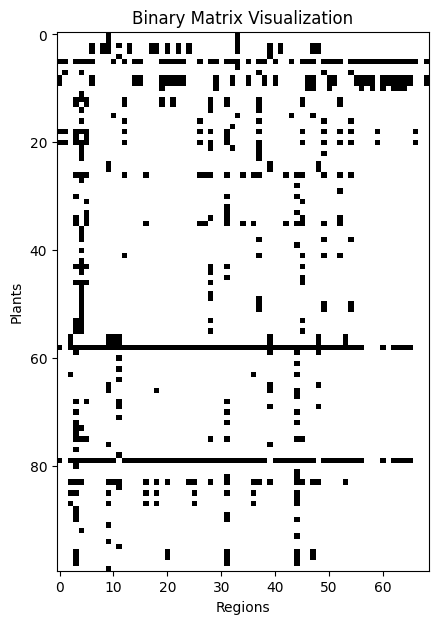

In [184]:
state_abbreviations =  us_states + canada_states + denmark_state + france_state
num_states = [len(us_states), len(canada_states), len(denmark_state), len(france_state)]

# Creating Pie chart based on states in each country
plt.figure(figsize =(10, 7))
plt.pie(num_states, labels = countries)

# Convert the DataFrame to a numpy array
first_100 = df.iloc[:100, :]

# Plot binary matrix
plt.figure(figsize =(10, 7))
plt.imshow(first_100, cmap='binary')
plt.xlabel('Regions')
plt.ylabel('Plants')
plt.title('Binary Matrix Visualization')
plt.show()

In [185]:
# Извлечение признаков для кластеризации (все столбцы кроме первого)
features_array = df.values  # Преобразуем признаки в массив NumPy
features_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [186]:

sum_squared_dist = []
K = range(2, len(state_abbreviations) + 1)

# Запуск KMeans для каждого значения k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)  # Определяем модель KMeans
    kmeans.fit(features_array)  # Тренируем модель на массиве признаков
    sum_squared_dist.append(kmeans.inertia_)  # inertia_ - сумма квадратов расстояний до центров кластеров



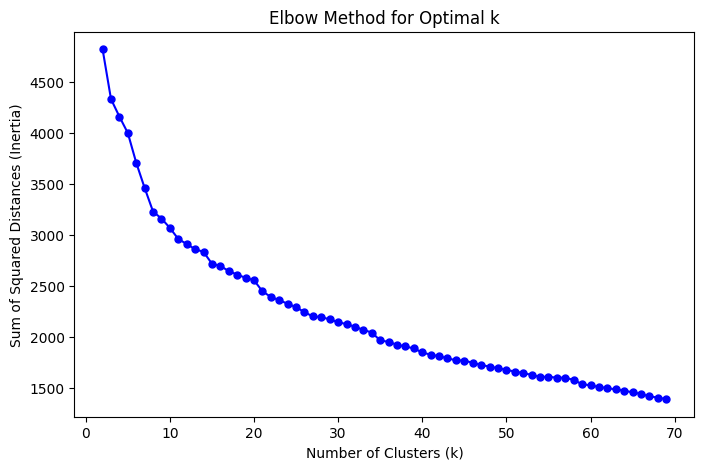

In [187]:
# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(K, sum_squared_dist, 'bo-', markersize=5)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

## KMeans

In [188]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()
scaler.fit(features_array)
ddf = scaler.transform(features_array)
features_array=ddf

In [189]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Обучение KMeans
optimal_clusters = 16
kmeans = KMeans(n_clusters=optimal_clusters, random_state=1)
predictions = kmeans.fit_predict(features_array)

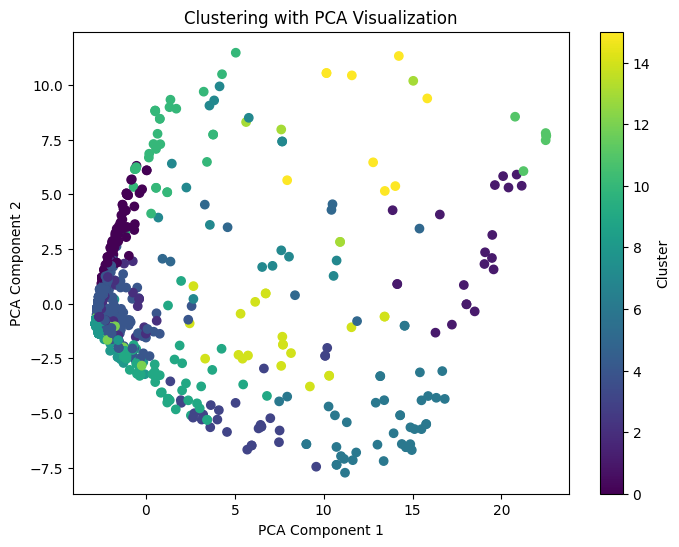

In [190]:
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features_array)
# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=predictions, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering with PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [191]:
from sklearn.metrics import silhouette_score
print(f'KMeans: Cредний коэффициент силуэта всех образцов: {silhouette_score(features_array,predictions)}')

KMeans: Cредний коэффициент силуэта всех образцов: 0.19087957005077466


## MiniBatchKMeans

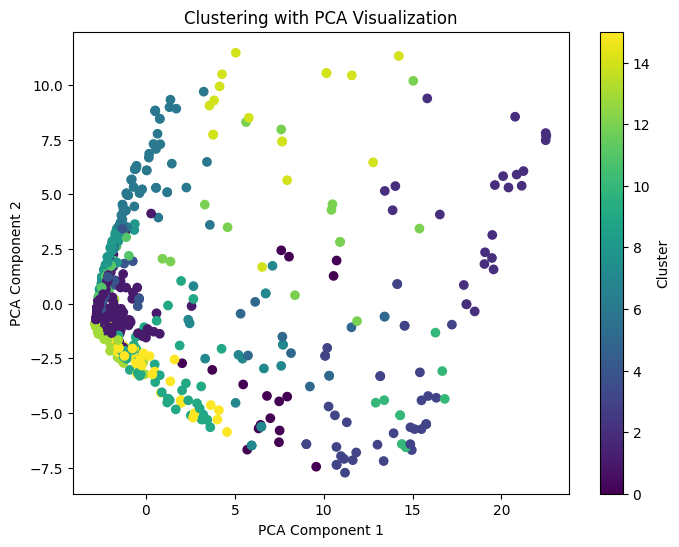

In [192]:
Minikmeans = MiniBatchKMeans(n_clusters=optimal_clusters, random_state=1)
predictions = Minikmeans.fit_predict(features_array)

# PCA для уменьшения размерности
pca = PCA(n_components=3)
pca_features = pca.fit_transform(features_array)

# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=predictions, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering with PCA Visualization')
plt.colorbar(label='Cluster')
plt.show() 

In [193]:
from sklearn.metrics import silhouette_score
print(f'MiniBatchKMeans: Cредний коэффициент силуэта всех образцов: {silhouette_score(features_array,predictions)}')

MiniBatchKMeans: Cредний коэффициент силуэта всех образцов: 0.150810762257209


## AffinityPropagation

In [261]:
af = AffinityPropagation(damping = 0.95,max_iter=650,convergence_iter=100,random_state=240)
predictions = af.fit_predict(features_array)

In [262]:
# PCA для уменьшения размерности
pca = PCA(n_components=2)
pca_features = pca.fit_transform(features_array) 

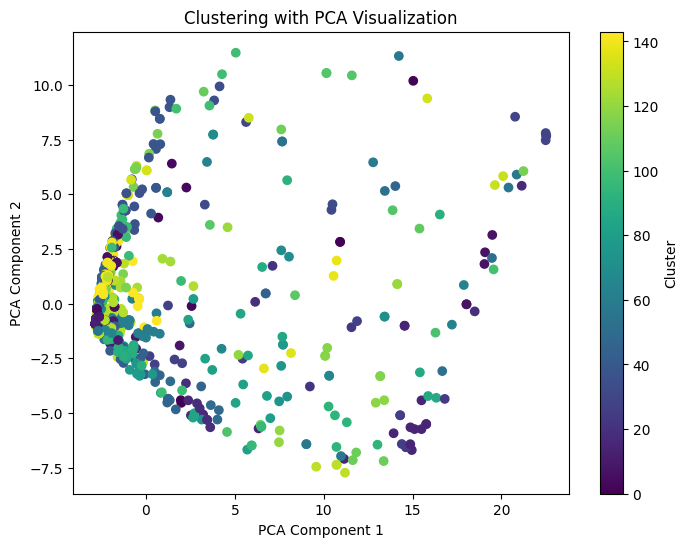

In [263]:
# Визуализация
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=predictions, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clustering with PCA Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [264]:
from sklearn.metrics import silhouette_score
print(f'AffinityPropagation: Cредний коэффициент силуэта всех образцов: {silhouette_score(features_array,predictions)}')

AffinityPropagation: Cредний коэффициент силуэта всех образцов: 0.4508300966400634
